# Сборный проект

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [2]:
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

## Шаг 1. Изучение данных

In [3]:
games = pd.read_csv('./datasets/games.csv')

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5194,Cubix Robots for Everyone: Clash 'n' Bash,GBA,NaN,Action,0.26,0.10,0.00,0.01,NaN,NaN,NaN
13047,Mortal Kombat X,PC,2015.0,Fighting,0.01,0.04,0.00,0.00,76.0,5.1,M
10783,Operation Abyss: New Tokyo Legacy,PSV,2014.0,Role-Playing,0.02,0.00,0.06,0.01,66.0,7.3,M
5190,Zoo Tycoon (2013),XOne,2013.0,Simulation,0.18,0.15,0.00,0.03,NaN,NaN,NaN
14829,Driver: Parallel Lines,Wii,2007.0,Racing,0.01,0.01,0.00,0.00,59.0,6,M
3628,Shin Super Robot Taisen,PS,1996.0,Role-Playing,0.00,0.00,0.52,0.04,NaN,NaN,NaN
159,Assassin's Creed II,PS3,2009.0,Action,2.54,1.93,0.21,0.86,91.0,8.6,M
9602,Top Shot Arcade,Wii,2011.0,Shooter,0.12,0.00,0.00,0.01,NaN,tbd,T
16441,Jambo! Safari Animal Rescue,DS,2009.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN
2833,Indiana Jones and the Staff of Kings,Wii,2009.0,Action,0.36,0.29,0.00,0.07,55.0,7,T


## Шаг 2. Подготовка данных

In [7]:
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
def calculate_total_sales(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']

games['total_sales'] = games.apply(calculate_total_sales, axis=1)
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9022,SafeCracker: The Ultimate Puzzle Adventure,DS,2009.0,Puzzle,0.07,0.06,0.0,0.01,43.0,tbd,E,0.14
15138,Bigfoot King of Crush,Wii,2011.0,Racing,0.02,0.00,0.0,0.00,NaN,tbd,E,0.02
4084,Jeopardy!,PS2,2003.0,Misc,0.24,0.18,0.0,0.06,NaN,NaN,NaN,0.48
10518,How to Train Your Dragon 2,PS3,2014.0,Adventure,0.03,0.06,0.0,0.02,NaN,tbd,E10+,0.11
8356,Garfield: Lasagna World Tour,PS2,2007.0,Action,0.08,0.06,0.0,0.02,NaN,tbd,E,0.16


In [9]:
games['user_score'].replace('tbd', np.NaN, inplace=True)
games['user_score'] = pd.to_numeric(games['user_score'])
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Преобразование типов в данном DataFrame не требуется, все типы такие, какими и должны быть. Есть типы которые бы хотелось преобразовать, например year_of_release в целочисленный, но мы не можем это сделать из-за пропусков, ведь они являются типом float.

Так же не требуется и обработка пропусков, ведь мы не можем воспользоваться медианным или средним значением для таких столбцов как user_score, не говоря уже о строковых столбцах. Если мы воспользуемся медианным или средним значением мы можем плохую игру сделать средней, так же как и хорошую игру сделать средней игрой, только запутав себя. Для дальнейшего анализа, достаточно будет выбрать данные без пропусков. Можно было бы заполнить year_of_release, воспользовавшись лемматезацией и выделить год у игр, у которых он есть в названии, но процент таких записей небольшой по этому это можно не делать. Пропуски могли возникнуть из-за ошибки в источнике, или из-за отсутсвия этих данных.

В столбце user_score, встречается абривеатура tbd, для дальнейшего анализа мы заменим её на NaN, чтобы иметь возможность проводить расчёты по этому столбцу.

### Шаг 3. Исследовательский анализ данных

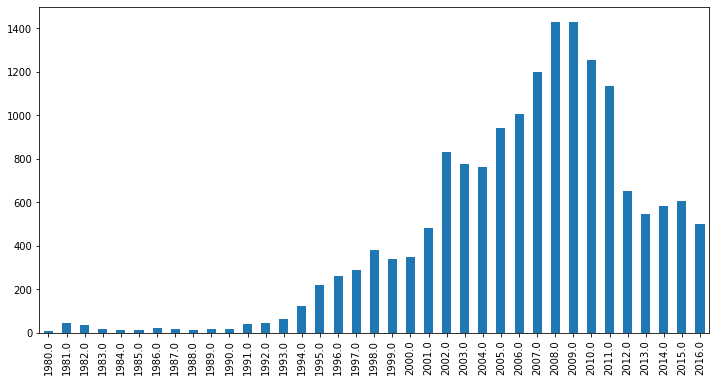

In [10]:
games['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))

Как видно из графика до 1994 года продажи игр были очень маленькие, индустрия видеоигр тогда только зарождалась, игр было мало и доступны малому количеству людей, в отличии от наших дней.

In [11]:
total_sales_by_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).head(10)
total_sales_by_platform

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Построив сводную таблицу мы можем увидеть, что рекордсменном по продажам была PS2, но и предыдущее поколение консолей(PS3, X360) от неё не сильно отстает.

In [12]:
games_by_top_sales = games.query('platform in @total_sales_by_platform.index') 
games_by_top_sales.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13953,Crypt Killer,PS,1997.0,Shooter,0.02,0.01,0.00,0.00,NaN,NaN,NaN,0.03
13046,My Horse & Me: Riding for Gold,Wii,2008.0,Sports,0.04,0.01,0.00,0.00,NaN,NaN,NaN,0.05
4053,One Piece: Grand Battle!,PS,2001.0,Fighting,0.00,0.00,0.46,0.03,NaN,NaN,NaN,0.49
11962,"Hi! Hamtaro - Little Hamsters,big Adventures: ...",DS,2005.0,Misc,0.07,0.00,0.00,0.00,NaN,NaN,NaN,0.07
15144,Europa Universalis III Complete,PC,2008.0,Strategy,0.00,0.02,0.00,0.00,NaN,8.7,E10+,0.02
12659,Satisfashion,DS,2010.0,Misc,0.05,0.00,0.00,0.00,NaN,NaN,NaN,0.05
1518,Pokemon Ranger: Guardian Signs,DS,2010.0,Role-Playing,0.50,0.16,0.58,0.05,68.0,8.2,E,1.29
11400,Cloudy With a Chance of Meatballs,PSP,2009.0,Platform,0.07,0.00,0.00,0.01,NaN,NaN,E,0.08
12389,Star Fighter,PS,1995.0,Shooter,0.04,0.02,0.00,0.00,NaN,NaN,NaN,0.06
4461,Eternal Sonata,PS3,2008.0,Role-Playing,0.19,0.12,0.07,0.05,80.0,7.8,T,0.43


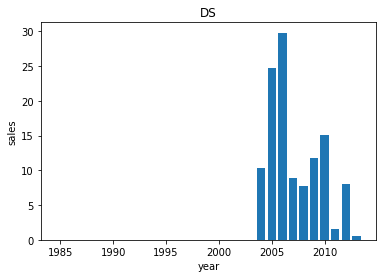

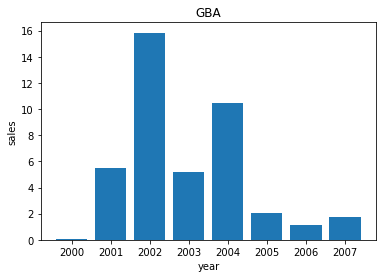

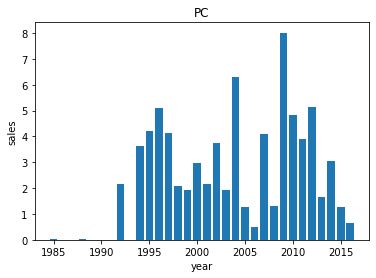

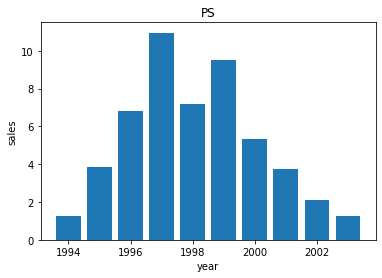

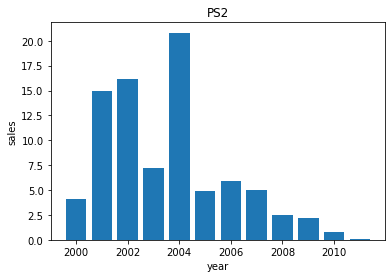

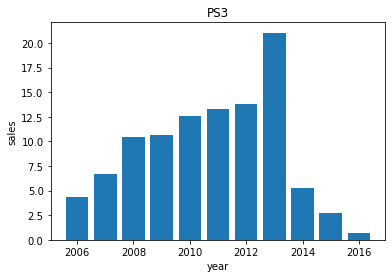

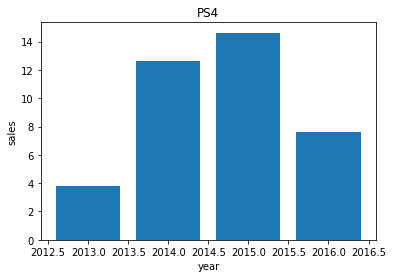

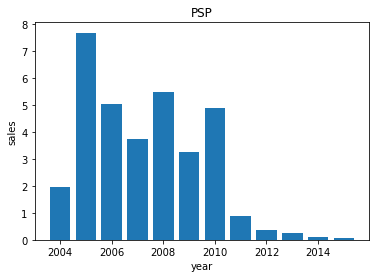

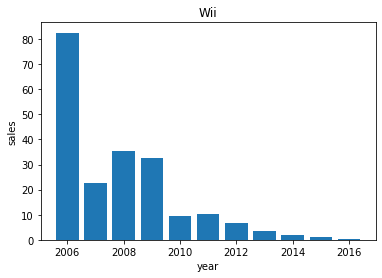

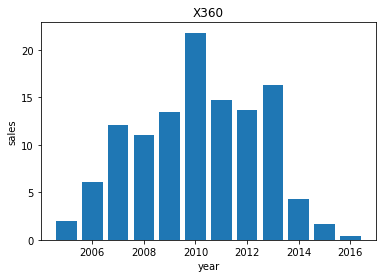

In [13]:
games_by_top_sales_by_year = games_by_top_sales.groupby(['platform', 'year_of_release'])[['total_sales']].sum().reset_index()
games_by_top_sales_by_year
for platform in games_by_top_sales_by_year['platform'].unique():
    tmp = games_by_top_sales[games_by_top_sales['platform'] == platform]
    plt.bar(tmp['year_of_release'], tmp['total_sales'])
    plt.title(platform)
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.show()

После построения графиков, мы видим, что среднее время жизни платформы составляет около 8-10 лет. При этом пиковые продажи приходят на середине жизни поколения, когда разработчики AAA и инди игр уже научились адаптировать игры под платформу после её выхода, из графиков выбивается только PC, т.к. это вечная платформа с воможностью апгрейда системы, чего не скажаешь о таких консолях как PS или Xbox. Для прогнозов на следующий (2017) год нам надо ориентироваться на платформы которые не старше 3 лет, такой выбор нам поможет захватить не только актуальные платформы, но и платформы прошлого поколения, на которые всё ещё выходят, например, crossgen игры. Соответственно берем игры которые были выпущены не раньше 2014 года.

In [14]:
actual_games = games.query('year_of_release >= 2014')
actual_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


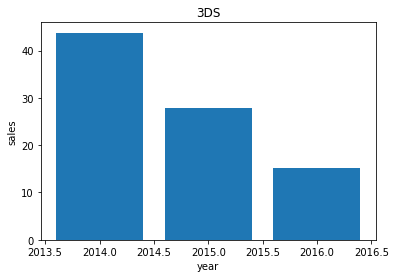

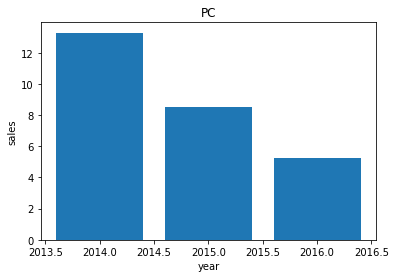

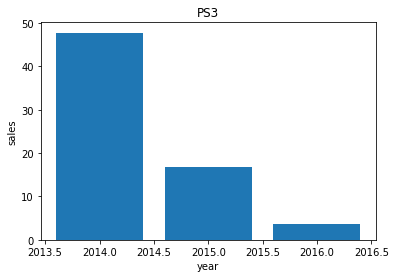

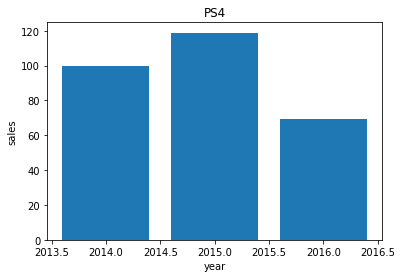

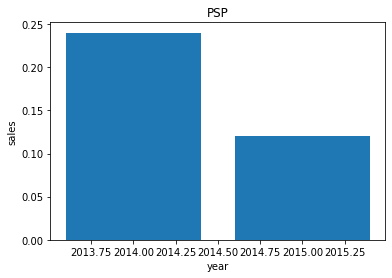

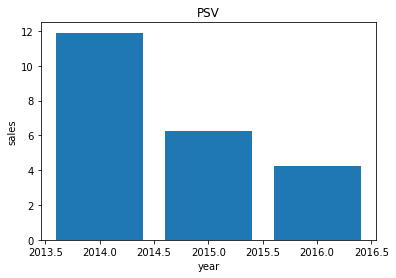

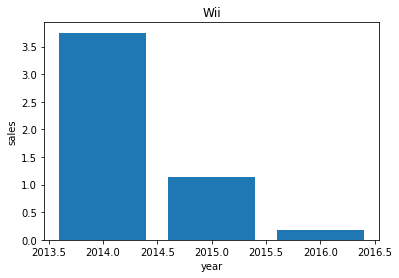

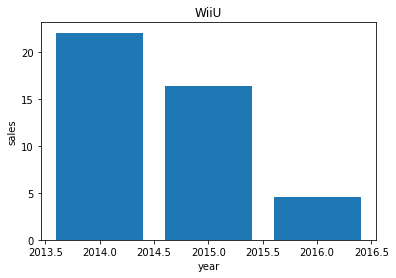

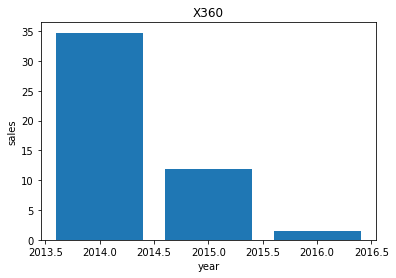

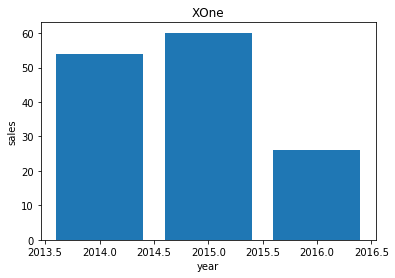

In [15]:
actual_games_by_platform_and_year = actual_games.groupby(['platform', 'year_of_release'])[['total_sales']].sum().reset_index()
actual_games_by_platform_and_year
for platform in actual_games_by_platform_and_year['platform'].unique():
    tmp = actual_games_by_platform_and_year[actual_games_by_platform_and_year['platform'] == platform]
    plt.bar(tmp['year_of_release'], tmp['total_sales'])
    plt.title(platform)
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.show()

Построив графики, мы можем увидеть, что рост продаж есть только на актуальном поколении консолей Xbox One, PS4, но так же нельзя исключать PC, 3DS и PSV. Хоть PC и показывает не сильный рост, но это вечно актуальная платформа, которую нельзя исключать. Даже если игры под неё делать дешевле, чем под остальные платформы. А 3DS и PSV являются портативными платформами, которые можно взять с собой и играть в любой точке мира.

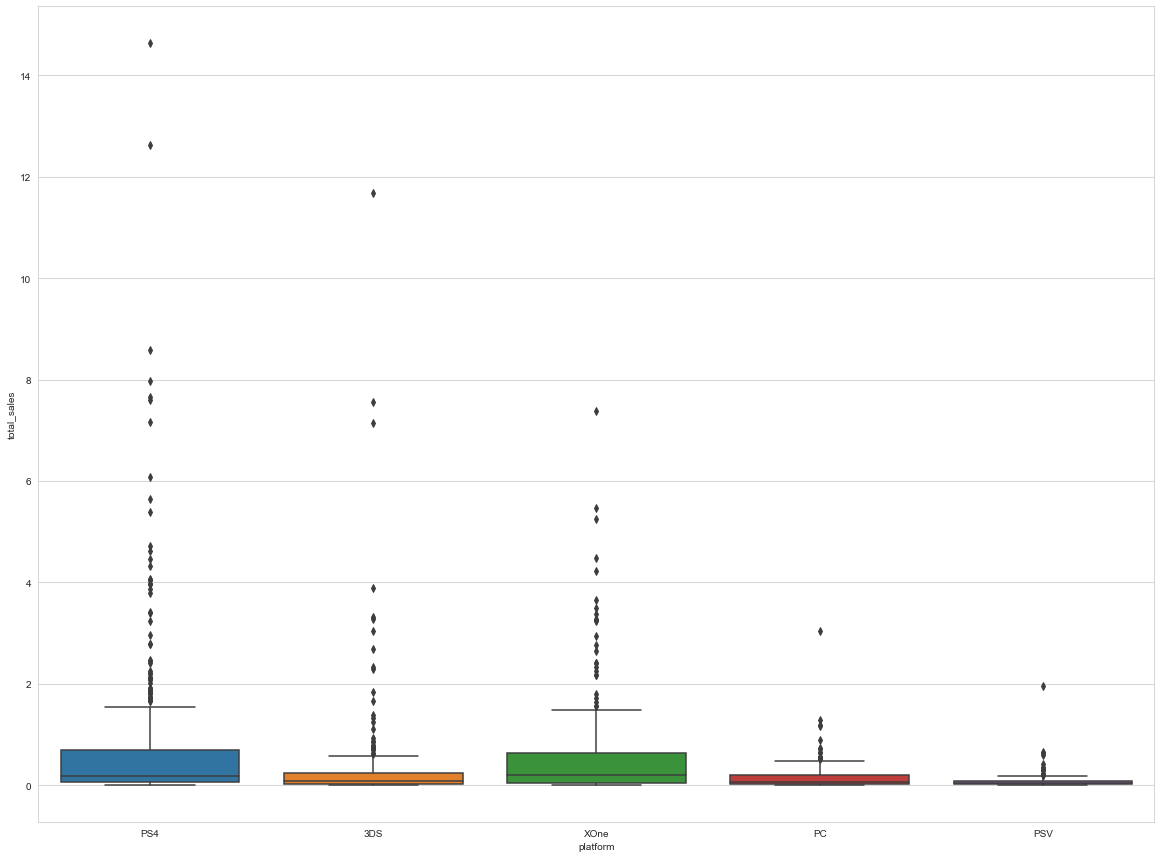

In [16]:
actual_platforms = ['PS4', 'XOne', 'PC', '3DS', 'PSV']
games_by_actual_platform = actual_games.query('platform in @actual_platforms')

sb.set_style('whitegrid') 
plt.figure(figsize=(20,15))
sb.boxplot(x = 'platform', y = 'total_sales', data = games_by_actual_platform) 

boxplot нам показывает что выручка с игр на консольных платформах PS4, Xbox One больше чем на PC и 3DS. На консолях PS4, XBox One это объяснятеся тем, что нету альтернативных способов скачать игры, кроме как купить на дисках или в цифровых магазинах, а на PC помимо того что разработка дешевле, игры можно скачивать с пиратских ресурсов. А 3DS достаточно низшевая консоль, хоть и с большими продажами. Так же видно большое количество выбросов, такие игры можно назвать хитами, которые расходятся огромным тиражом.

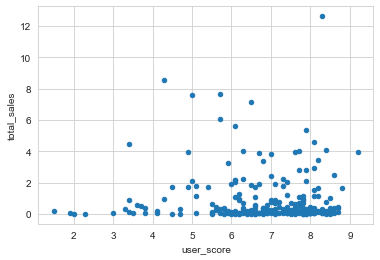

Корреляция между пользовательским рейтингом и продажами: -0.040131589472697356



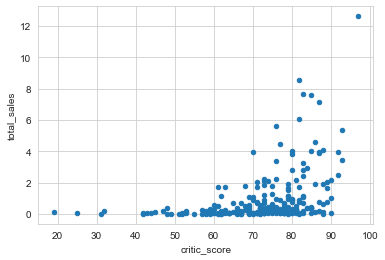

Корреляция между рейтингом критиков и продажами: 0.40266141068104083


In [17]:
ps4_games = games_by_actual_platform[games_by_actual_platform['platform'] == 'PS4']
ps4_games.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()
print('Корреляция между пользовательским рейтингом и продажами:', ps4_games['total_sales'].corr(ps4_games['user_score']))
print()
ps4_games.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()
print('Корреляция между рейтингом критиков и продажами:', ps4_games['total_sales'].corr(ps4_games['critic_score']))

Построив диаграммы рассеивания и посчитав корреляции в рамках иследования платформы PS4 мы можем увидеть, что оценка критиков сильнее влияет на продажи игр, чем пользовательский рейтинг.

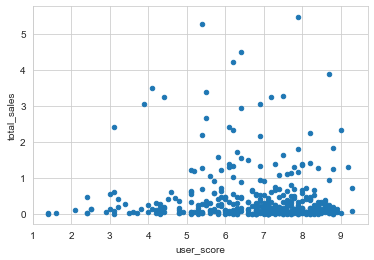

Корреляция между пользовательским рейтингом и продажами: -0.044762341180395994



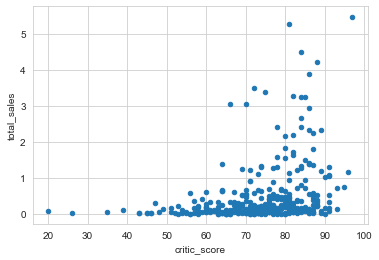

Корреляция между рейтингом критиков и продажами: 0.3035534489522108


In [18]:
not_ps4_games = games_by_actual_platform[games_by_actual_platform['platform'] != 'PS4']
not_ps4_games.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()
print('Корреляция между пользовательским рейтингом и продажами:', not_ps4_games['total_sales'].corr(not_ps4_games['user_score']))
print()
not_ps4_games.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()
print('Корреляция между рейтингом критиков и продажами:', not_ps4_games['total_sales'].corr(not_ps4_games['critic_score']))

Ту же картину мы видим и для отсальных платформ.

In [19]:
sales_by_genre = games_by_actual_platform.pivot_table(index='genre', values='total_sales', aggfunc={'count', 'sum', 'mean'}).sort_values('sum', ascending=False)
sales_by_genre

,count,mean,sum
genre,,,
Action,460,0.342500,157.55
Shooter,96,1.461250,140.28
Role-Playing,183,0.494699,90.53
Sports,102,0.756275,77.14
Misc,76,0.287368,21.84
Fighting,36,0.521944,18.79
Racing,52,0.342115,17.79
Adventure,145,0.091517,13.27
Simulation,40,0.308250,12.33


По количеству игр и продажам лидером оказался жанр Action, но средний доход с игры больше у шутеров, хоть экшн и лидер по продажам, но эти игры взяли числом, но не качеством, 460 игр против 96, и 96 шутеров, выглядят прибыльней, чем 460 Action игр. Самые низкоприбыльные это пазлы, симуляторы, платформеры и стратегии, так это достаточно низшевые жанры.

## Шаг 4. Составление портрета пользователя каждого региона

In [20]:
region_sales = {'na_sales': 'Северной америке', 'eu_sales': 'Европе', 'jp_sales': 'Японии'}
for region in region_sales:
    platforms_in_region = games_by_actual_platform.pivot_table(index='platform', values=region, aggfunc={'count', 'sum', 'mean'}).sort_values('sum', ascending=False)
    print('Топ 5 платформ в', region_sales[region])
    display(platforms_in_region.head(5))
    print()

Топ 5 платформ в Северной америке


,count,mean,sum
platform,,,
PS4,376,0.262261,98.61
XOne,228,0.356447,81.27
3DS,212,0.106792,22.64
PC,151,0.047881,7.23
PSV,295,0.008542,2.52



Топ 5 платформ в Европе


,count,mean,sum
platform,,,
PS4,376,0.345851,130.04
XOne,228,0.202851,46.25
PC,151,0.119007,17.97
3DS,212,0.076038,16.12
PSV,295,0.011966,3.53



Топ 5 платформ в Японии


,count,mean,sum
platform,,,
3DS,212,0.208679,44.24
PS4,376,0.039947,15.02
PSV,295,0.049288,14.54
XOne,228,0.001404,0.32
PC,151,0.000000,0.00


Из полученных сводных таблиц, что в Европе и Северной популярны PS4 и XBox One, в отличии от Японии. Такие показатели можно объяснить тем, что в Японии маленькие квартиры и там сложно поместить большой телевизор, приставку и т.д. гораздо проще купить портативную консоль и играть на ней лежа на кровати, поэтому в Японии популярней 3DS и PSV. Так же в азиатских странах принято поддерживать локальные компании, поэтому в Японии слабые продажи XBox One. Так же видно что PS4 самая популярная и прибыльная консоль.

In [21]:
for region in region_sales:
    genre_in_region = games_by_actual_platform.pivot_table(index='genre', values=region, aggfunc={'count', 'sum', 'mean'}).sort_values('sum', ascending=False)
    print('Топ 5 жанров в', region_sales[region])
    display(genre_in_region.head(5))
    print()

Топ 5 жанров в Северной америке


,count,mean,sum
genre,,,
Shooter,96,0.672500,64.56
Action,460,0.120000,55.20
Sports,102,0.310392,31.66
Role-Playing,183,0.158798,29.06
Misc,76,0.109211,8.30



Топ 5 жанров в Европе


,count,mean,sum
genre,,,
Action,460,0.130348,59.96
Shooter,96,0.572396,54.95
Sports,102,0.325392,33.19
Role-Playing,183,0.139180,25.47
Racing,52,0.207115,10.77



Топ 5 жанров в Японии


,count,mean,sum
genre,,,
Role-Playing,183,0.155410,28.44
Action,460,0.052217,24.02
Misc,76,0.056974,4.33
Fighting,36,0.111944,4.03
Adventure,145,0.021931,3.18


Из полученных сводных таблиц мы видем что вкусы по жанрам у Европейцев и Американцев очень похожи, в отличии от Японцев, если в Европе и Америке доминируют экшены и шутеры, то у Японцев доминирует RPG. Скорее всего это связано с их культырным кодом. Они любят примерять на себя образы персонажей и пр. Так же японцы не особо жалуют стрельбу, поэтому у них не популярны шутеры.

In [22]:
for region in region_sales:
    rating_in_region = games_by_actual_platform.pivot_table(index='rating', values=region, aggfunc={'count', 'sum', 'mean'}).sort_values('sum', ascending=False)
    print('Продажи по рейтингу в', region_sales[region])
    display(rating_in_region.head(5))
    print()

Продажи по рейтингу в Северной америке


,count,mean,sum
rating,,,
M,208,0.393269,81.80
T,208,0.148173,30.82
E,144,0.206597,29.75
E10+,114,0.157982,18.01



Продажи по рейтингу в Европе


,count,mean,sum
rating,,,
M,208,0.394231,82.00
E,144,0.279931,40.31
T,208,0.139231,28.96
E10+,114,0.120965,13.79



Продажи по рейтингу в Японии


,count,mean,sum
rating,,,
T,208,0.055865,11.62
M,208,0.029904,6.22
E,144,0.033819,4.87
E10+,114,0.022018,2.51


Продажи по рейтингам отличаются по такому же приципу, что и по жанру, например один из самых популярных шутеров Call of Duty имеет рейтинг M. Чем выше рейтинг тем больше там запрешенного для детей контента, таких как кровь, мат и пр. поэтому в Европе и Америке доминируют рейтинг M, так как там популярней шутеры и разного рода экшн игры, а в Японии T, ведь в RPG важны механики и лор, а не мат, кровь и пр.

## Шаг 5. Проверка гипотез

In [23]:
alpha = .05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0 - средние пользовательские рейтинги платформ Xbox One и PC равны

H1 - средние пользовательские рейтинги платформ Xbox One и PC различается

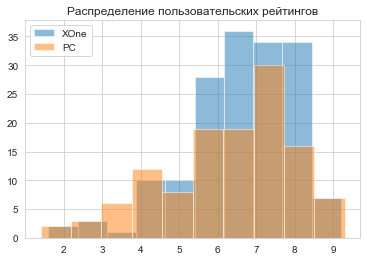

In [24]:
games_with_user_score = games_by_actual_platform[games_by_actual_platform['user_score'].notnull()]
pc_games = games_with_user_score[games_with_user_score['platform'] == 'PC']
xone_games = games_with_user_score[games_with_user_score['platform'] == 'XOne']

fig, ax = plt.subplots()
ax.hist(xone_games['user_score'], alpha=0.5, label='XOne')
ax.hist(pc_games['user_score'], alpha=0.5, label='PC')
ax.set_title('Распределение пользовательских рейтингов')
plt.legend()
plt.show()

Так как у нас две независимых выборки с дискретными величинами, распределение которых стремятся к нормальному, для проверки гипотезы мы используем критерий стъюдента.

In [25]:
mean_raiting_by_platform = st.ttest_ind(
    xone_games['user_score'], 
    pc_games['user_score'])

print('p-значение:', mean_raiting_by_platform.pvalue)

if (mean_raiting_by_platform.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Вывод:** p-value показывает нам, что нет оснований отвергать нулевую гипотезу. 

### Средние пользовательские рейтинги жанров Action и Sports разные.

H0 - cредние пользовательские рейтинги жанров Action и Sports равны

H1 - cредние пользовательские рейтинги жанров Action и Sports различаются

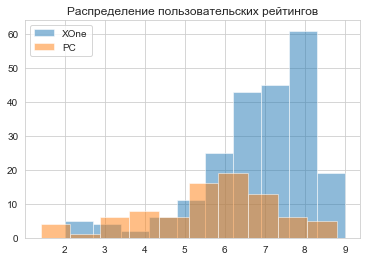

In [26]:
action_games = games_with_user_score[games_with_user_score['genre'] == 'Action']
sports_games = games_with_user_score[games_with_user_score['genre'] == 'Sports']

fig, ax = plt.subplots()
ax.hist(action_games['user_score'], alpha=0.5, label='XOne')
ax.hist(sports_games['user_score'], alpha=0.5, label='PC')
ax.set_title('Распределение пользовательских рейтингов')
plt.legend()
plt.show()

Так как у нас две независимых выборки с дискретными величинами, распределение которых стремятся к нормальному, для проверки гипотезы мы используем критерий стъюдента.

In [27]:
mean_raiting_by_genre = st.ttest_ind(
    action_games['user_score'], 
    sports_games['user_score'])

print('p-значение:', mean_raiting_by_genre.pvalue)

if (mean_raiting_by_genre.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.3095447434044677e-10
Отвергаем нулевую гипотезу


## Шаг 6. Общий вывод

Проведя анализ данных и проверив гипотезы мы можем сделать вывод что глобально самые популярные платформы текущего поколения это Xbox One, PS4 и PC. 

Так же в ходе иследования мы выяснили средний жизненный цикл платформы это около 8 лет, поэтому, мы можем предсказывать, когда выйдут платформы нового поколения. 

Из иследования можно вывести формулу успешной игры как для западного, так и для азиатского рынка. На западе это экшн или шутер выпущенный на PC, Xbox One и PS4, для азиатского это RPG выпущенная на портативныз консолях PS Vita или 3DS и на PS4. Анализ по регионам нам показал, что запад и восток это совершенно два разных мира с разными желаниями и культурой, поэтому невозможно выпустить универсальную игру. 

Так же очень важен хороший отзыв об игре от критиков, т.к. люди часто решают покупать игру или нет именно по отзывам критикам, особенно на старте, когда они уже успели поиграть и составить своё мнение об игре, только подогрев желание её купить или наоборот, может отговорить от покупки этой игры.

Ещё мы смогли отвергнуть тот факт, что на разных платформах различаются средние пользовательские рейтинги, чего не скажешь об играх разных жанров.